In [1]:
import pandas as pd 
import re 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import warnings 
from sklearn.metrics import mean_squared_error as mse 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


warnings.simplefilter('ignore')

In [10]:
import pandas as pd 

df=pd.read_excel('Coffee_shop_data.xlsx')
population=pd.read_csv('population.csv', skiprows=[0])

In [12]:
population = pd.read_csv('population.csv' ,sep='\t')
print (population.head())

   1          Brew Haven        8 Old Shore Place    Oakland  California  \
0  2          Bean Bliss  6650 Clarendon Crossing   Stockton  California   
1  3       Caffeine Cove          7281 Buell Road     Fresno  California   
2  4           Mug Magic       670 Jackson Avenue   Torrance  California   
3  5         Daily Grind     37 Ludington Terrace  San Diego  California   
4  6   Espresso Elegance         8427 Atwood Road    Visalia  California   

   94616  415-810-4769  4.50    Male   $72,463   $3.31  
0  95210  209-701-1665   5.0  Female   $87,117   $5.35  
1  93773  559-137-3554   4.7    Male   $86,394   $4.15  
2  90510  818-789-5573   4.3    Male   $88,343   $5.34  
3  92196  619-354-2389   1.6    Male   $77,795   $4.51  
4  93291  559-929-4731   1.2  Female   $78,753   $5.32  


In [13]:
df.head()

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
0,1,Brew Haven,8 Old Shore Place,Oakland,California,94616,415-810-4769,4.5,Male,72463,3.31000
1,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.0,Female,87117,5.35000
2,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.7,Male,86394,4.15000
3,4,Mug Magic,670 Jackson Avenue,Torrance,California,90510,818-789-5573,4.3,Male,88343,5.34000
4,5,Daily Grind,37 Ludington Terrace,San Diego,California,92196,619-354-2389,1.6,Male,77795,4.51175


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID no.           1000 non-null   int64  
 1   Business Name    1000 non-null   object 
 2   Street address   1000 non-null   object 
 3   City             1000 non-null   object 
 4   State            1000 non-null   object 
 5   Zip Code         1000 non-null   int64  
 6   Phone            1000 non-null   object 
 7   Rating           1000 non-null   float64
 8   Gender majority  1000 non-null   object 
 9   Median Salary    1000 non-null   int64  
 10  Latte Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [15]:
df.shape

(1000, 11)

In [16]:
population.shape

(999, 11)

In [17]:
df.describe

<bound method NDFrame.describe of      ID no.        Business Name           Street address            City  \
0         1           Brew Haven        8 Old Shore Place         Oakland   
1         2           Bean Bliss  6650 Clarendon Crossing        Stockton   
2         3        Caffeine Cove          7281 Buell Road          Fresno   
3         4            Mug Magic       670 Jackson Avenue        Torrance   
4         5          Daily Grind     37 Ludington Terrace       San Diego   
..      ...                  ...                      ...             ...   
995     996        Sip & Stories       7 Mockingbird Park  San Bernardino   
996     997        Perk Paradise            8 Cody Street         Burbank   
997     998   Urban Brewtropolis        141 Burrows Place     Los Angeles   
998     999       Steamy Moments  42004 Bellgrove Terrace          Orange   
999    1000   Caffeine Communion       783 Gateway Center        Pasadena   

          State  Zip Code         Phone  

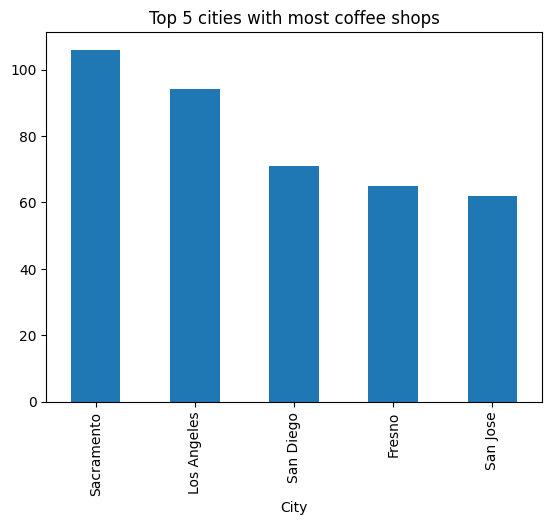

In [19]:
import matplotlib.pyplot as plt 
ax=df['City'].value_counts().head(5).plot(kind='bar')
ax.set_title('Top 5 cities with most coffee shops')
plt.show()

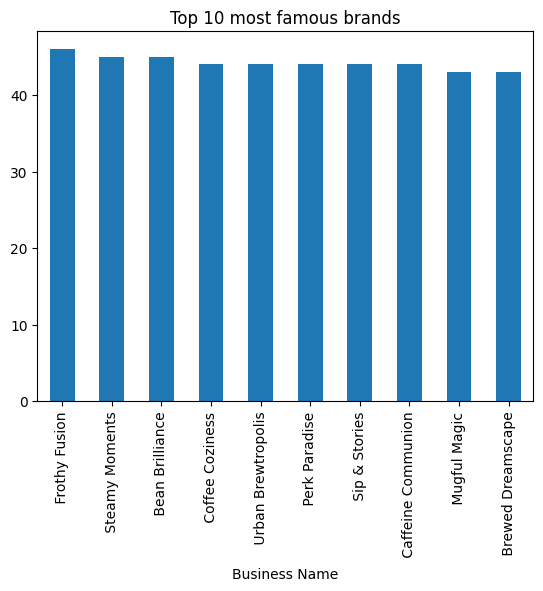

In [21]:
import matplotlib.pyplot as plt 
ax=df['Business Name'].value_counts().head(10).plot(kind ='bar')
ax.set_title('Top 10 most famous brands')
plt.show()

In [22]:
df.isna().sum()

ID no.             0
Business Name      0
Street address     0
City               0
State              0
Zip Code           0
Phone              0
Rating             0
Gender majority    0
Median Salary      0
Latte Price        0
dtype: int64